<center><h1>Part II: Logistic Regression</h1></center>

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.


Ram Chandra Bhavirisetty(50414405)<br>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [87]:
peng_data=pd.read_csv("~/documents/penguins.csv")
peng_data.drop(['year'],axis=1,inplace=True)

peng_data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [88]:
peng_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [89]:
peng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [90]:
peng_data.shape

(344, 7)

In [91]:
peng_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


<h2>I. Data Cleaning</h2>
<p> Data cleaning by replacing NaN's Median of that column, and replaced MODE() value for categorical column 'sex'.

In [92]:
peng_data[peng_data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [93]:
two_median=peng_data['bill_length_mm'].median()
three_median=peng_data['bill_depth_mm'].median()
four_median=peng_data['flipper_length_mm'].median()
five_median=peng_data['body_mass_g'].median()
mode_val=peng_data.iloc[:,6].mode()

print(mode_val)

0    male
dtype: object


In [94]:
values={'bill_length_mm':two_median,'bill_depth_mm':three_median,'flipper_length_mm':four_median,'body_mass_g':five_median}

peng_data.iloc[[3,271],2:6]=peng_data.iloc[3,2:6].fillna(value=values)

for i in range(len(peng_data)):
    if peng_data['sex'][i] not in ['male','female']:
        peng_data.iloc[i,6] = mode_val

peng_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,female
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,male
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,female


<h3> Converting string to Categorical Data. </h3>

In [95]:
peng_data['species']=peng_data['species'].astype('category')
peng_data['island']=peng_data['island'].astype('category')
peng_data['sex']=peng_data['sex'].astype('category')
peng_species=set(peng_data['species'])
peng_island=set(peng_data['island'])
peng_sex=set(peng_data['sex'])

peng_data.replace(dict(zip(peng_species,[1,2,3])),inplace=True)
peng_data.replace(dict(zip(peng_island,[1,2,3])),inplace=True)
peng_data.replace(dict(zip(peng_sex,[0,1])),inplace=True)

peng_data.info()
peng_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.10,18.7,181.0,3750.0,1
1,1,3,39.50,17.4,186.0,3800.0,0
2,1,3,40.30,18.0,195.0,3250.0,0
3,1,3,44.45,17.3,197.0,4050.0,1
4,1,3,36.70,19.3,193.0,3450.0,0


In [96]:
peng_data[peng_data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


<h3>II. Normalizing non-categorical data</h3>
<p> Normalizing values using the formula - (x-min(x))/(max(x)-min(x)). </p>

In [97]:
max_min_vals=[]
for i in range(2,6):
    x=peng_data.iloc[:,i]
    max_min_vals.append((min(x),max(x)))
    peng_data.iloc[:,i]=(x-min(x))/(max(x)-min(x))
    
peng_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,0.254545,0.666667,0.152542,0.291667,1
1,1,3,0.269091,0.511905,0.237288,0.305556,0
2,1,3,0.298182,0.583333,0.389831,0.152778,0
3,1,3,0.449091,0.500000,0.423729,0.375000,1
4,1,3,0.167273,0.738095,0.355932,0.208333,0


<h3>III. Maximum and minimum values are stored</h3>

In [98]:
max_min_vals

[(32.1, 59.6), (13.1, 21.5), (172.0, 231.0), (2700.0, 6300.0)]

<Figure size 432x288 with 0 Axes>

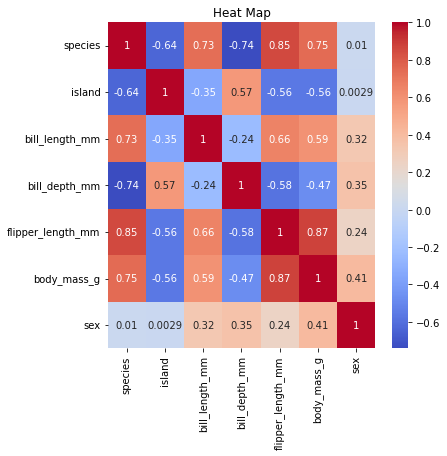

In [99]:
fig=plt.figure()
fig,ax1=plt.subplots(figsize=(6,6))
ax1.set_title("Heat Map")
corr_matrix=peng_data.corr()
#print(corr_matrix)
correlation_heat_map=sb.heatmap(corr_matrix,annot=True,cmap="coolwarm")



<h3>IV. Dividing data into training and test set.</h3>
<p> > This can be done by first selecting input features and target variable. Based on the correlation graph above, 'SPECIES' variable can be excluded. <br>
    > I'm going to perform Binary Classification for gender(Male/Female). </p>

In [100]:
inputs=peng_data.iloc[:,1:6]
target=peng_data['sex']
#print(inputs.shape,target.shape)
print(list(inputs.columns))

['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [101]:
n1=len(peng_data)
_80=int((80*n1)/100)
_20=n1-_80
x_train=inputs.iloc[:_80]
x_test=inputs.iloc[:_20]
y_train=target.iloc[:_80]
y_test=target.iloc[:_20]

w=np.zeros((1,275))
x_train=np.array(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape((275,1))

<h3>V. Logistic Regression Implementation</h3>
<p> 

In [102]:
class logisticregression():
    def __init__(self,learning_rate,iterations):
        self.learning_rate=learning_rate
        self.iterations=iterations
        
        
    def fit(self,x_train,y_train):
        loss=[]
        n=x_train.shape[1]
        b=np.random.uniform(0,1)
        weights=np.array([np.random.uniform(0, 1) for i in range(x_train.shape[1])]).reshape((1,x_train.shape[1]))
        #weights=np.zeros((1,x_train.shape[1]))
        #print(weights,b)
        for i in range(self.iterations):
            dw,db=self.gradient_descent(weights,x_train,y_train,n,b)
            cost=self.cost(weights,x_train,y_train,n,b)
            weights=weights-(self.learning_rate*dw.T)
            b=b-self.learning_rate*db
            #print(b)
            loss.append(cost)
        return weights,b,loss
            
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def cost(self,w,x,y,n,b):
        h=self.sigmoid(np.dot(w,x.T)+b)
        j=(-1/n)*np.sum(y.T*np.log(h)+((1-y.T)*np.log(1-h)))
        return j
        
    def gradient_descent(self,w,x,y,n,b):
        #print(w.shape,'deed',x.shape,'cfrv',y.shape)
        pred=self.sigmoid(np.dot(w,x.T)+b)
        y1=y.T
        #print(y1[:3],pred.shape)
        delta=pred-y1
        dw=(1/n)*np.dot(x.T,delta.T)
        #print(dw.shape,'dw')
        db = (1/n)*(np.sum(delta))
        return dw,db
        
    def predict(self,x,w,b):
        y_pred=np.zeros((1,len(x)))
        result=self.sigmoid(np.dot(w,x.T)+b)
        #print(result)
        for i in range(y_pred.shape[1]):
            if result[0][i]>=0.5:
                y_pred[0][i]=1
        return y_pred
        

In [103]:
model=logisticregression(0.0247,100000)

w,b,loss=model.fit(x_train,y_train)

y_train_pred=model.predict(x_train,w,b)

y_test_pred=model.predict(x_test,w,b)

In [104]:
def confusion_matrix(ytest,ypred):
    _00=0
    _01=0
    _10=0
    _11=0
    for i in range(len(ytest)):
        if ytest[i]==0 and int(ypred[0][i])==0:
            _00=_00+1
        elif ytest[i]==0 and int(ypred[0][i])==1:
            _01=_01+1
        elif ytest[i]==1 and int(ypred[0][i])==0:
            _10=_10+1
        else:
            _11=_11+1
    return _00,_01,_10,_11

In [105]:
_00,_01,_10,_11=confusion_matrix(np.array(y_train),y_train_pred)
c_matrix_train=np.array([_00,_01,_10,_11]).reshape((4,1)).reshape((2,2))

print("Confusion Matrix for Train data: ")
print(c_matrix_train,end='\n')

train_tot=y_train_pred.shape[1]
training_accuracy=(_00+_11)/train_tot
print("Training Accuracy for binary classification:",training_accuracy*100,'%')

_00,_01,_10,_11=confusion_matrix(np.array(y_test),y_test_pred)
c_matrix_test=np.array([_00,_01,_10,_11]).reshape((4,1)).reshape((2,2))

print("Confusion Matrix for Test data: ")
print(c_matrix_test,end='\n')

test_tot=y_test_pred.shape[1]
test_accuracy=(_00+_11)/test_tot
print("Test Accuracy for binary classification:",test_accuracy*100,'%')

Confusion Matrix for Train data: 
[[115  16]
 [ 12 132]]
Training Accuracy for binary classification: 89.81818181818181 %
Confusion Matrix for Test data: 
[[27  5]
 [ 5 32]]
Test Accuracy for binary classification: 85.5072463768116 %


<h3>VI. Visualizations</h3>

Text(0.5, 0, 'Loss')

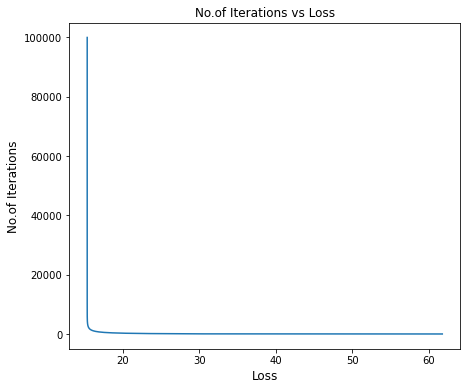

In [107]:
fig=plt.figure(figsize=(7,6))

plt.plot(loss,range(len(loss)))
plt.title("No.of Iterations vs Loss",fontsize=12)
plt.ylabel("No.of Iterations",fontsize=12)
plt.xlabel("Loss",fontsize=12)

References:
1. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a